This assignment is based on Support Vector Machines.

**Instructions for this assignment:**


1.   Certain sections of code are missing are have being replaced by 'pass'. You need to replace 'pass' with your block of code by following the instructions provided.  




# Linear SVM

In [3]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # A module of scikit-learn library used for implementing SVM. SVC stands for Support Vector Classifier

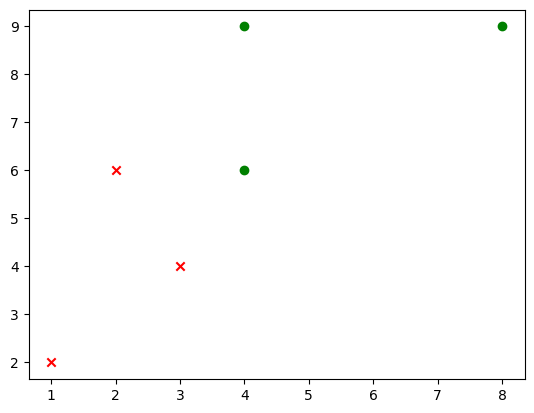

In [4]:
#Preparation of dataset

x = np.array([[1,2],[4,6],[8,9], [3,4], [2,6], [4,9]])
y = np.array([0, 1, 1, 0, 0, 1])
for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

**Task 1**: Read about kernel argument of SVC and replace kernal_used by the kernel required for linear SVM.

In [5]:
kernel_used = 'linear'
Classifier = SVC(gamma = 'auto', kernel = kernel_used)
Classifier.fit(x, y)

SVC(gamma='auto', kernel='linear')

**Task 1:** Find the equation of boundary by using the parameters

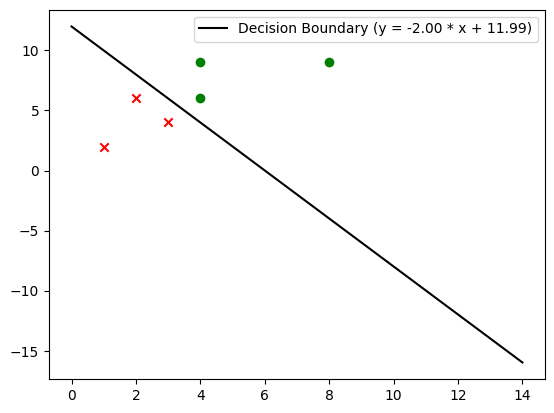

In [6]:
#####
weight_matrix = Classifier.coef_[0]
slope = -weight_matrix[0]/weight_matrix[1]
bias = - Classifier.intercept_[0]/weight_matrix[1]
val = np.linspace(0, 14)
boundary = slope * val + bias
#####

plt.plot(val, boundary, 'k', label=f"Decision Boundary (y = {slope:.2f} * x + {bias:.2f})") #write the equation for the decision boundary using the variables used above

for i in range(y.shape[0]):
  if (y[i]==0):
      plt.scatter(x[i][0], x[i][1],color='red', marker='x')
  else:
      plt.scatter(x[i][0], x[i][1],color='green', marker='o')

plt.legend()
plt.show()

# Non- Linear SVM

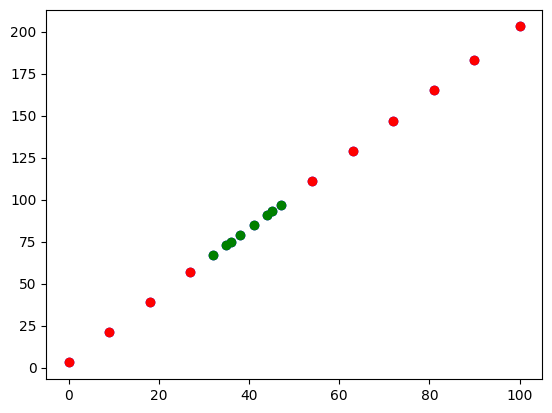

In [9]:
#Preparation of dataset
x1 = np.linspace(0, 100, 12, dtype=int)
x1 = np.append(x1, np.linspace(30, 50, 8, dtype=int))
x1 = np.sort(x1)
x1 = np.delete(x1, np.where(x1 == 30))
x1 = np.delete(x1, np.where(x1 == 50))
n = x1.size
x2 = 2*x1+3
coordinates = np.column_stack((x1, x2))
label = np.zeros(n, dtype=int)
plt.scatter(x1, x2, color="blue")
for i in range(n):
  if(30<x1[i]<50):
    label[i]=1
    plt.scatter(x1[i],x2[i],color="green")
  else:
    label[i]=0
    plt.scatter(x1[i],x2[i],color="red")

**Answer the following questions** \\
Q: Is the above dataset linearly separable?
Ans: No

Q. How many classes are there in the above dataset?
Ans: 2

Q. How many features are used in the above dataset?
Ans: 2
Q. What will be dimension of hyperplane used for this dataset?  
Ans: dimension = 1, hyperplane will be linear

#Splitting the Dataset
**Task**: Split the given dataset into training and testing data. The code snippet to illustrate the data has been given.

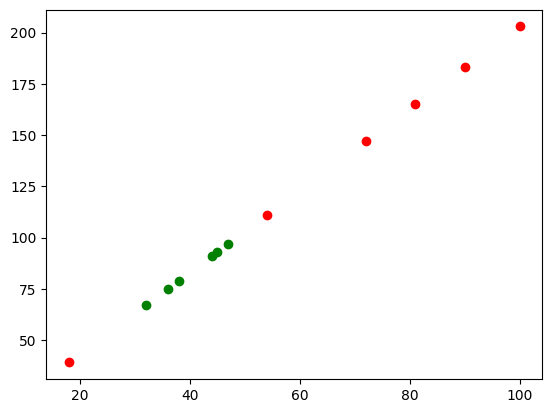

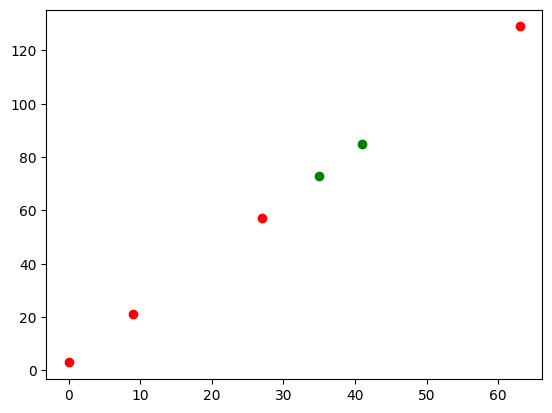

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(coordinates, label, test_size=0.3, random_state=42)

for i in range (X_train.T[0].size):
  if(Y_train[i]==1):
    plt.scatter(X_train[i][0], X_train[i][1], color="green")
  else:
    plt.scatter(X_train[i][0], X_train[i][1], color="red")
plt.show()

for i in range (X_test.T[0].size):
  if(Y_test[i]==1):
    plt.scatter(X_test[i][0], X_test[i][1], color="green")
  else:
    plt.scatter(X_test[i][0], X_test[i][1], color="red")
plt.show()

# Non Linear Classifier
**Task 1**: Generate a classifier for the above dataset using suitable kernel function. Also, provide an explanation for your choice of kernel. \\
Ans: The given dataset is not linearly separable so a non linear classifier with a suitable kernel will be used.For this dataset, a radial basis function (RBF) kernel, also known as the Gaussian kernel, would be a suitable choice.

**Task 2**: Explain and illustrate, using plots, how the kernel used, enables the data to be classified using a SVC.

[  0   9  18  27  32  35  36  38  41  44  45  47  54  63  72  81  90 100]
[  3  21  39  57  67  73  75  79  85  91  93  97 111 129 147 165 183 203]


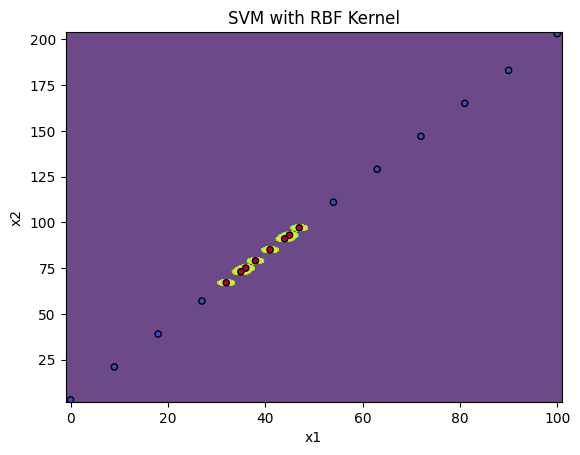

In [14]:
from sklearn.svm import SVC

Classifier = SVC(kernel='rbf', gamma='auto')
Classifier.fit(coordinates, label)

x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
boundary = Classifier.predict(np.c_[xx.ravel(), yy.ravel()])
boundary = boundary.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, boundary, alpha=0.8)
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM with RBF Kernel')
plt.show()